In [1]:
%reload_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import fppnpx as fn
from fppnpx.FPPGLM import FPPGLM
from fppnpx.signalfuncs import load_signal, gen_all_channel_signals
from wavemapnpx.WaveMAPClassifier import WaveMAPClassifier

In [6]:
CUSTOM_PAL_SORT_3 = ['#5e60ce', '#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da', '#1eb43a']
cmap = colormaps.get_cmap('Set1')

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [7]:
apath = "/Users/mateouma/Downloads/monkey datasets/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0_t0.exported.imec0.ap-001.bin"
cpath = "/Users/mateouma/Downloads/monkey datasets/cluster_info_task.tsv"
wpath = "/Users/mateouma/Downloads/monkey datasets/20230630_DLPFCwaveforms.mat"

fs = 30000
time_window = [100,123] # seconds within the recording

signal_dataset = load_signal(appath=apath, time_window=time_window, fs=fs, cipath=cpath, wfpath=wpath)
channel_signals = gen_all_channel_signals(signal_dataset, 300, False)

Generated 112 channel signals.


In [8]:
# takes the average waveform from each unit
mean_unit_waveforms = np.array(signal_dataset["waveform_info"]["waveforms"]).mean(axis=2)
mean_unit_waveforms.shape

(138, 62)

In [31]:
wavemap_cluster_labels = np.load("chkdelay_dlpfc_0630_wavemap_clusters_0421.npy")

In [74]:
wavemap_cluster_labels

array([0, 1, 0, 4, 3, 4, 5, 4, 4, 4, 4, 5, 7, 5, 0, 1, 3, 5, 7, 8, 0, 5,
       8, 3, 3, 8, 4, 5, 2, 4, 7, 3, 8, 7, 3, 4, 7, 8, 1, 2, 6, 3, 0, 1,
       6, 8, 3, 7, 4, 7, 4, 7, 4, 7, 8, 6, 1, 1, 1, 7, 1, 6, 3, 1, 8, 1,
       7, 2, 8, 7, 1, 8, 1, 1, 8, 5, 8, 8, 8, 6, 4, 6, 1, 0, 0, 7, 0, 6,
       6, 5, 2, 7, 4, 6, 7, 0, 3, 2, 6, 3, 6, 0, 1, 6, 0, 6, 4, 0, 5, 5,
       0, 0, 5, 2, 5, 5, 3, 8, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 8, 8, 5, 8, 5], dtype=int32)

In [119]:
from sklearn.mixture import GaussianMixture

In [132]:
waveforms_scaled = waveforms = (mean_unit_waveforms - mean_unit_waveforms.mean(axis=1)[:,None]) / np.abs(mean_unit_waveforms).max(axis=1)[:,None]

In [172]:
tester = GaussianMixture(n_components=9)
unit_labst = tester.fit_predict(waveforms_scaled)

In [142]:
gm = GaussianMixture(n_components=6, random_state=0)

In [143]:
unit_labs = gm.fit_predict(waveforms_scaled)

In [144]:
unit_labs

array([0, 4, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 5, 0, 0, 5, 0, 0, 5, 4, 0, 0,
       4, 0, 0, 0, 1, 0, 2, 1, 1, 0, 4, 5, 0, 1, 1, 4, 5, 2, 5, 0, 0, 5,
       5, 4, 0, 1, 1, 1, 1, 4, 1, 5, 4, 5, 5, 5, 5, 1, 4, 5, 0, 5, 4, 5,
       5, 3, 4, 1, 5, 4, 4, 4, 4, 0, 4, 4, 4, 5, 1, 5, 4, 0, 0, 5, 0, 5,
       5, 0, 3, 5, 1, 5, 5, 0, 0, 2, 5, 0, 5, 0, 5, 5, 0, 5, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 4, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 4, 4, 0, 4, 0])

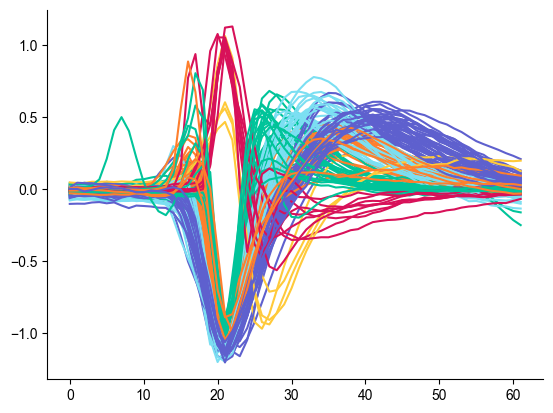

In [145]:
for i,wf in enumerate(waveforms_scaled):
    plt.plot(wf, color=CUSTOM_PAL_SORT_3[unit_labs[i]])

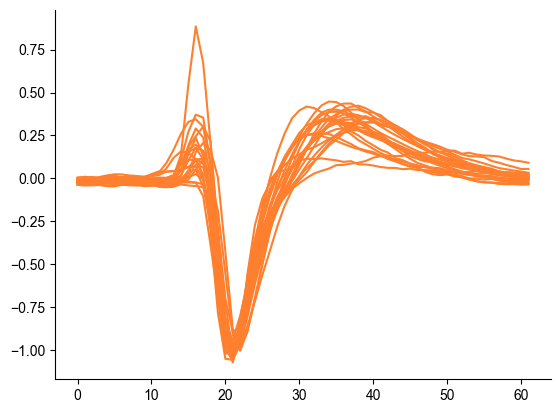

In [171]:
gm_lab = 4
plt.plot(waveforms_scaled[unit_labs == gm_lab].T, color=CUSTOM_PAL_SORT_3[gm_lab])
#plt.plot(waveforms_scaled[unit_labs == 1].T, color=CUSTOM_PAL_SORT_3[1])
plt.show()

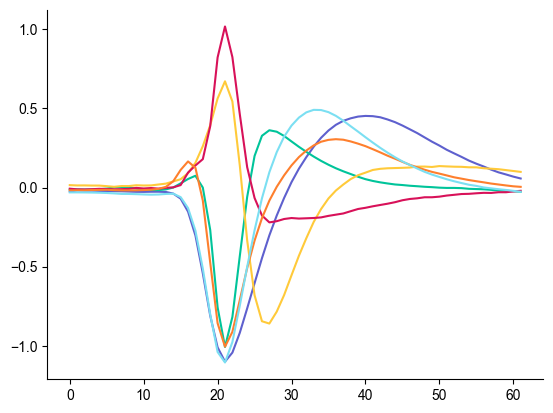

In [198]:
for i in range(6):
    plt.plot(waveforms_scaled[unit_labs == i].mean(axis=0), color=CUSTOM_PAL_SORT_3[i])

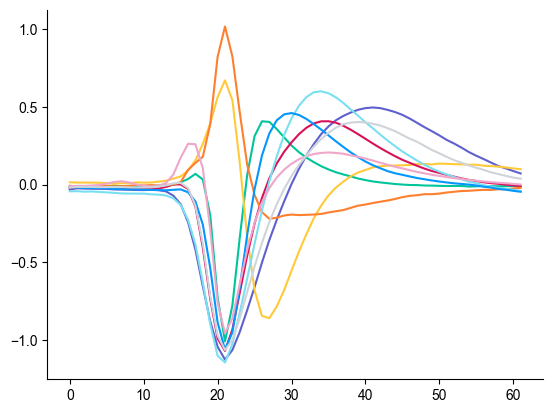

In [197]:
for i in range(9):
    plt.plot(waveforms_scaled[unit_labst == i].mean(axis=0), color=CUSTOM_PAL_SORT_3[i])